# Train OCR su text Detector

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrKz-2019-04-26.zip
unzip autoriaNumberplateOcrKz-2019-04-26.zip
mv autoriaNumberplateOcrKz-2019-04-26 kz
```
or use your own dataset.

In [1]:
import os
import sys
import json
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "su"
VERSION = "2020_10_20_tensorflow_v2"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [2]:
class su(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И', 
                        'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Э', 'Ю', 'Я']
        
        self.EPOCHS = 2
        

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'С', 'Т', '2', 'З', 'В', '4', 'Я', 'Е', 'Б', 'М', 'Э', '1', 'Г', 'И', 'Щ', '3', 'У', 'А', '9', 'Р', '6', 'О', 'К', 'Д', 'Х', 'Н', 'Ф', 'Ш', 'П', 'Л', 'Ц', 'Ж', 'Ю', '5', '7', 'Ч', '8', '0'}
Letters val  {'С', 'Т', '2', 'З', 'В', '4', 'Я', 'Е', 'Б', 'М', 'Э', '1', 'Г', 'И', 'Щ', '3', '9', 'А', 'Д', 'Р', '6', 'О', 'К', 'У', 'Х', 'Н', 'Ф', 'Ш', 'П', 'Л', 'Ц', 'Ю', 'Ж', '5', '7', 'Ч', '8', '0'}
Letters test  {'С', 'Т', '2', 'З', 'В', '4', 'Я', 'Е', 'Б', 'Э', 'М', '1', 'Г', 'И', 'Щ', '3', '9', 'У', 'А', 'Д', '6', 'К', 'Р', 'О', 'Х', 'Н', 'Ф', 'Ш', 'П', 'Л', 'Ц', 'Ж', 'Ю', '5', '7', 'Ч', '8', '0'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 А Б В Г Д Е Ж З И К Л М Н О П Р С Т У Ф Х Ц Ч Ш Щ Э Ю Я

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) th

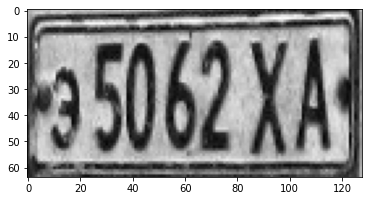

2) the_labels (plate number): Э5062ХА is encoded as [35, 5, 0, 6, 2, 30, 10]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED
CPU times: user 48min 42s, sys: 22min 28s, total: 1h 11min 10s
Wall time: 50.7 s


In [3]:
%%time
ocrTextDetector = su()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False)

In [ ]:
%%time
model = ocrTextDetector.train()

In [ ]:
%%time
ocrTextDetector.test(verbose=True)

In [ ]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'Щ', 'З', 'Г', 'Я', 'Б', 'К', '7', 'Е', '8', 'Р', '9', 'Ц', 'Ч', 'Э', '0', 'М', 'У', 'Н', 'Ш', 'В', '6', '5', 'Х', 'П', 'Т', 'Д', 'И', '4', '3', '1', 'С', 'Ф', 'Ю', 'Ж', '2', 'А', 'Л', 'О'}
Letters val  {'Щ', 'З', 'Г', 'Я', 'К', 'Е', '7', '8', '9', 'А', 'Ц', 'Р', 'Ч', 'Э', '0', 'М', 'У', 'Н', 'Ш', 'В', '6', '5', 'Х', 'П', 'Т', 'Д', 'И', '4', '3', '1', 'С', 'Ф', 'Ю', 'Ж', '2', 'Б', 'Л', 'О'}
Letters test  {'Щ', 'З', 'Г', 'Я', 'К', '7', 'Е', '8', '9', 'А', 'Р', 'Ц', 'Ч', 'Э', 'М', '0', 'У', 'Н', 'Ш', 'В', '6', '5', 'Х', 'П', 'Т', 'Д', 'И', '4', '3', 'С', '1', 'Ф', 'Ю', 'Ж', '2', 'Б', 'Л', 'О'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 А Б В Г Д Е Ж З И К Л М Н О П Р С Т У Ф Х Ц Ч Ш Щ Э Ю Я

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) th

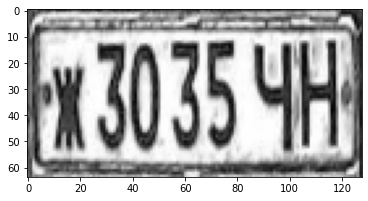

2) the_labels (plate number): Ж3035ЧН is encoded as [16, 3, 0, 3, 5, 32, 22]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_su (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_su[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
________________________________

In [9]:
# Train with aug
ocrTextDetector = su()
ocrTextDetector.EPOCHS = 1

model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

model = ocrTextDetector.train(load_last_weights=True)

In [10]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 4691НБ
True: 			 Ф4691НБ

Predicted: 		 8270МА
True: 			 8270ГКА

Predicted: 		 7844ВВВФ
True: 			 7844ВВФ

Predicted: 		 И4510МО
True: 			 Щ4510МО

Predicted: 		 Г7996Д
True: 			 Г7996ЛД

Predicted: 		 0800ПЧ
True: 			 0800РДЧ

Predicted: 		 В2КЛ
True: 			 В2989ЧУ

Predicted: 		 Г4813КЛ
True: 			 Г4313КЛ

Predicted: 		 С9345НР
True: 			 Е9345ЯР

Predicted: 		 Е1878МЛ
True: 			 Е1978МЛ

Predicted: 		 Е2763МТ
True: 			 С2763МТ

Predicted: 		 Е5898ДО
True: 			 Ф5898ДО

Predicted: 		 О0018СА
True: 			 В0018СА

Predicted: 		 З2563МК
True: 			 Э2563МК

Predicted: 		 М4509ДП
True: 			 Н4509ДП

Predicted: 		 9808ТТТВ
True: 			 9808ТТВ

Predicted: 		 В3352УИ
True: 			 В3352УК

Predicted: 		 2188ББ
True: 			 2188БЕБ

Predicted: 		 В3904ХА
True: 			 З3904ХА

Predicted: 		 И5392ЗП
True: 			 Н5392ЗП

Predicted: 		 В1003ВХ
True: 			 В1093ВХ

Predicted: 		 В476МЕ
True: 			 Д4113МЕ

Predicted: 		 А7285ОН
True: 			 А7761ОН

Predicted: 		 Э4470К
True: 			 Э4470КК

Predicted: 		

In [ ]:
ocrTextDetector.save(os.path.join(NOMEROFF_NET_DIR, 
                                  "models/", 'anpr_ocr_aug_{}_{}_v2.h5'.format(DATASET_NAME, VERSION)), verbose=True)
# anpr_ocr_aug_su_2020_10_20_tensorflow_v2.h5 current name of anpr_ocr_aug_su_2020_08_26_tensorflow_v2_v2.h5